# Unsupervised Learning tutorial

### Load data
* We'll be starting off using the iris dataset

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

### Print out the dictionary keys and the dataset description
* Save data and target to their own variables, and print their shape

In [3]:
for key in iris.keys():
    print(key)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [6]:
data_array=iris.data
target_array=iris.target
print(data_array.shape)
print(target_array.shape)

(150, 4)
(150,)


In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Use your target array to make a list (called color_list) with different colors for the different targets
* With matplotlib's scatter function, make 2D plots comparing the different dimensions (use the color_list to ID the different classes)

In [10]:
target_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
color_list = []
for i in range (len(target_array)):
    if target_array[i] == 0:
        color_list.append('purple')
    elif target_array[i] == 1:
        color_list.append('orange')
    elif target_array[i] == 2:
        color_list.append('green')
    

In [52]:
print(len(color_list))
print(color_list)

150
['purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'oran

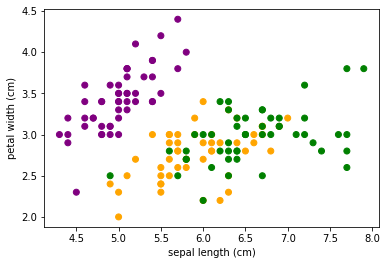

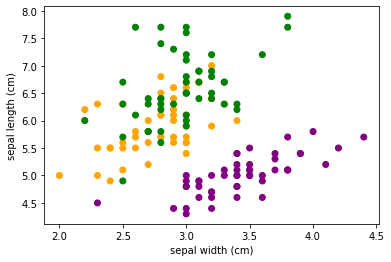

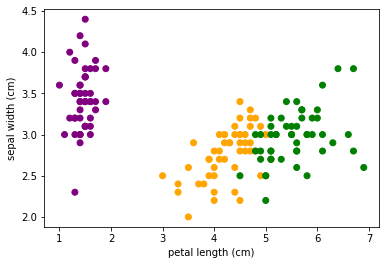

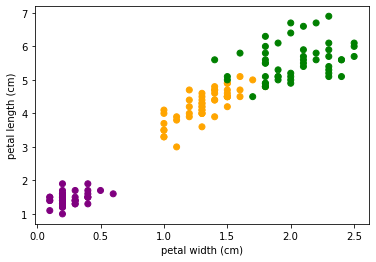

In [53]:
for column in range (data_array.shape[1]):
    if column == 0:
        plt.scatter(data_array[:,column], data_array[:,column+1], c=color_list)
        plt.xlabel(iris.feature_names[column])
        plt.ylabel(iris.feature_names[column+3])
        plt.show()
    else:
        plt.scatter(data_array[:,column], data_array[:,column-1], c=color_list)
        plt.xlabel(iris.feature_names[column])
        plt.ylabel(iris.feature_names[column-1])
        plt.show()

In [56]:
import pandas as pd
df = pd.DataFrame(iris['data'], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df=df.assign(species=iris['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


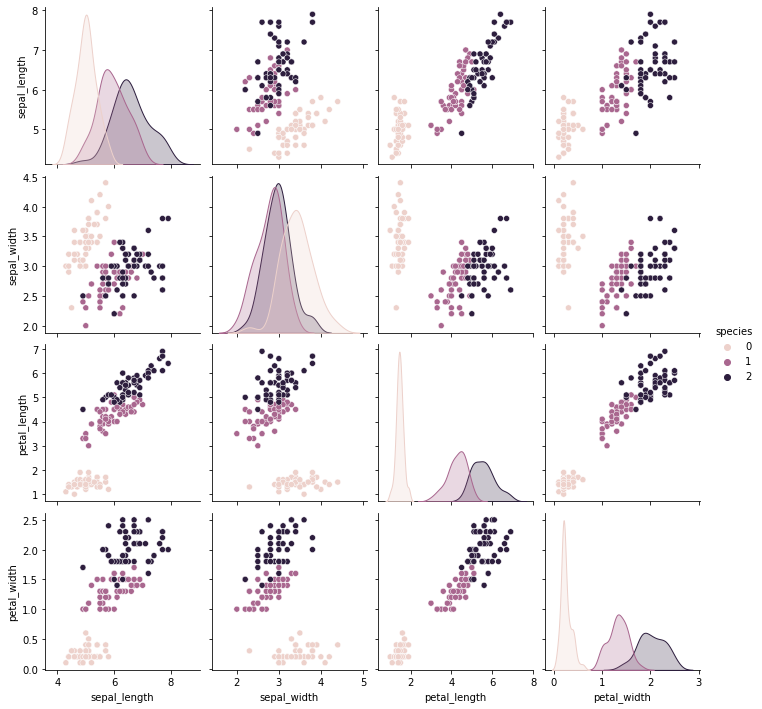

In [58]:
import seaborn as sns
sns.pairplot(df,hue='species')

### PCA
* Plot the transformed data
* print the explained variance

In [59]:
from sklearn import decomposition

In [87]:
pca = decomposition.PCA(n_components=4)
pca.fit(data_array)
data_array_trans = pca.transform(data_array)

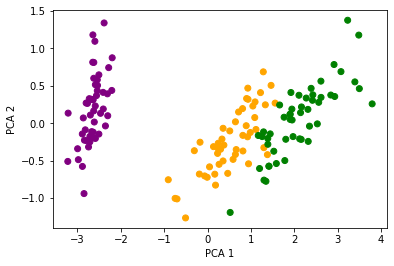

In [92]:
plt.scatter(data_array_trans[:,0], data_array_trans[:,1], c=color_list)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [89]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


### t-SNE

In [93]:
from sklearn.manifold import TSNE

In [102]:
data_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20).fit_transform(data_array)
data_embedded.shape

(150, 2)

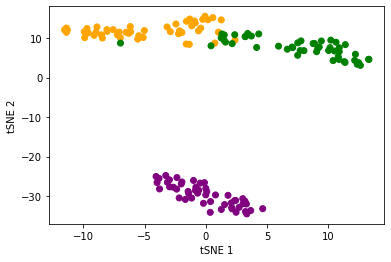

In [103]:
plt.scatter(data_embedded[:,0], data_embedded[:,1], c=color_list)
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.show()

### KMeans
* Make a color_list_kmeans, and use it to make a scatter plot to compare with the real labels

In [104]:
from sklearn.cluster import KMeans

In [149]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_array)

In [150]:
kmeans_labels = [kmeans.labels_]

In [151]:
color_list_kmeans = []
for i in (kmeans.labels_):
    if i == 0:
        color_list_kmeans.append('purple')
    elif i == 1:
        color_list_kmeans.append('orange')
    elif i == 2:
        color_list_kmeans.append('green')

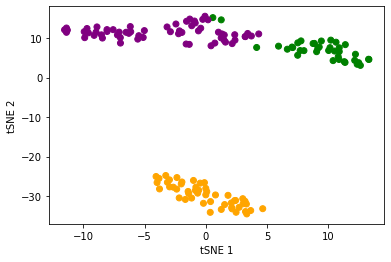

In [152]:
plt.scatter(data_embedded[:,0], data_embedded[:,1], c=color_list_kmeans)
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.show()

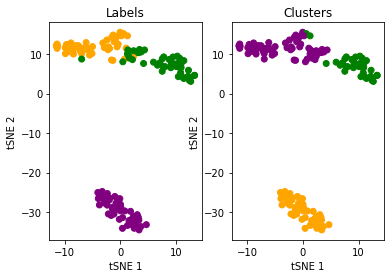

In [153]:
plt.subplot(1, 2, 1)
plt.scatter(data_embedded[:,0], data_embedded[:,1], c=color_list)
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('Labels')

plt.subplot(1, 2, 2)
plt.scatter(data_embedded[:,0], data_embedded[:,1], c=color_list_kmeans)
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('Clusters')

plt.show()